In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_prep import RecomendadorClimatico, Transformaciones, CargaData, AgregarPH

In [2]:
path = '../data/raw/'

In [3]:
# 2.Importación fuente de datos

In [4]:
carga = CargaData(path+'data.csv')
df = carga.obtener_data()
agregar_ph = AgregarPH(df)
df_con_ph = agregar_ph.generar_ph_mensual()
df_con_ph.to_csv(path+"/df_con_ph.csv", index=False)

In [5]:
#Lectura datos históricos
df = pd.read_csv(path+'df_con_ph.csv',encoding = "ISO-8859-1",delimiter=',')

In [ ]:
"""
Fuente: NASA/POWER – Resolución nativa mensual y anual
Fechas (mes/día/año): del 01/01/1981 al 31/12/2025 en hora solar local (LST)
Ubicación: Latitud 9.8062  Longitud -83.8448
Elevación según MERRA-2: Promedio para una región de 0.5 x 0.625 grados de latitud/longitud = 1064.94 metros
Valor para datos faltantes que no pueden ser calculados o que están fuera del rango de disponibilidad de las fuentes: -999
Parámetro(s):
- PRECTOTCORR: Precipitación corregida de MERRA-2 (mm/día)
- PRECTOTCORR_SUM: Suma de la precipitación corregida de MERRA-2 (mm/día)
- QV2M: Humedad específica a 2 metros según MERRA-2 (g/kg)
- RH2M: Humedad relativa a 2 metros según MERRA-2 (%)
- T2M: Temperatura a 2 metros según MERRA-2 (°C)
- T2M_MAX: Temperatura máxima a 2 metros según MERRA-2 (°C)
- T2M_MIN: Temperatura mínima a 2 metros según MERRA-2 (°C)
"""

In [6]:
df.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,MAR_PH_SUELO,APR_PH_SUELO,MAY_PH_SUELO,JUN_PH_SUELO,JUL_PH_SUELO,AUG_PH_SUELO,SEP_PH_SUELO,OCT_PH_SUELO,NOV_PH_SUELO,DEC_PH_SUELO
0,PRECTOTCORR,1981,2.64,3.32,1.72,6.02,6.66,11.86,3.34,9.65,...,8.63,4.70,3.78,5.34,5.79,8.05,7.58,3.03,7.93,8.92
1,PRECTOTCORR,1982,3.30,2.99,1.35,3.71,8.90,2.92,8.43,4.88,...,6.40,5.81,4.64,7.64,3.54,4.16,4.75,8.68,7.94,6.48
2,PRECTOTCORR,1983,1.38,0.09,0.93,3.76,3.01,4.61,5.27,5.66,...,6.21,4.88,3.86,5.01,3.45,6.24,8.78,5.59,3.75,4.04
3,PRECTOTCORR,1984,0.69,1.01,0.60,2.72,4.78,5.78,4.80,6.55,...,3.90,4.72,5.14,4.60,8.80,8.83,8.75,8.16,6.27,7.43
4,PRECTOTCORR,1985,1.94,0.41,0.50,0.84,2.21,8.02,5.41,4.31,...,8.09,4.77,6.30,8.77,4.65,3.85,4.67,8.43,4.05,4.16


In [7]:
df.tail()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,MAR_PH_SUELO,APR_PH_SUELO,MAY_PH_SUELO,JUN_PH_SUELO,JUL_PH_SUELO,AUG_PH_SUELO,SEP_PH_SUELO,OCT_PH_SUELO,NOV_PH_SUELO,DEC_PH_SUELO
310,T2M_MIN,2021,13.59,15.41,13.38,15.34,15.95,15.07,16.23,15.62,...,4.31,3.53,8.94,6.30,6.15,5.93,6.07,3.13,5.25,5.04
311,T2M_MIN,2022,15.20,12.54,14.26,15.80,16.22,15.30,16.29,15.27,...,5.77,7.11,8.94,8.24,5.82,5.39,7.43,4.41,3.09,7.46
312,T2M_MIN,2023,14.71,13.53,15.29,14.76,16.99,15.81,16.89,17.24,...,8.65,7.25,8.92,8.48,6.22,5.58,5.55,3.69,6.47,6.69
313,T2M_MIN,2024,15.93,13.93,14.21,14.95,16.76,17.71,16.85,17.28,...,4.84,3.46,8.67,7.39,4.51,4.83,3.05,5.33,7.14,6.49
314,T2M_MIN,2025,14.90,15.61,15.96,16.50,-999.00,-999.00,-999.00,-999.00,...,3.11,3.59,3.88,4.41,7.01,7.00,4.37,6.18,5.78,3.11


In [8]:
#Notamos que anno 2025 como NO ha fanilizado tiene valores -999, esto afectaria el molode
#por lo que el grupo decide eliminar esta columna

In [9]:
# Filtrar los datos para eliminar el año 2025
df = df[df['YEAR'] != 2025]

In [10]:
df.to_csv(path+"/df_sin_2025.csv", index=False)

In [11]:
recomendador = RecomendadorClimatico(path+"df_sin_2025.csv", path+"datos_con_recomendaciones_completo.csv")
recomendador.procesar()

✅ Archivo generado: ../data/raw/datos_con_recomendaciones_completo.csv


In [12]:
#Lectura datos nuevos
df = pd.read_csv(path+'datos_con_recomendaciones_completo.csv',encoding = "ISO-8859-1",delimiter=',')

In [ ]:
# 3.Análisis de Datos (EDA) + Preprocesado

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           528 non-null    int64  
 1   MONTH          528 non-null    object 
 2   lluvia_mm      528 non-null    float64
 3   temp_max       528 non-null    float64
 4   temp_min       528 non-null    float64
 5   humedad        528 non-null    float64
 6   ph_suelo       528 non-null    float64
 7   Recomendacion  528 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 33.1+ KB


In [14]:
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

YEAR             0
MONTH            0
lluvia_mm        0
temp_max         0
temp_min         0
humedad          0
ph_suelo         0
Recomendacion    0
dtype: int64

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,528.0,2002.500000,12.710467,1981.00,1991.7500,2002.500,2013.250,2024.00
lluvia_mm,528.0,5.246534,3.767827,0.02,2.4450,4.700,7.240,25.99
temp_max,528.0,26.288277,1.649643,23.34,25.1700,25.950,27.015,31.78
temp_min,528.0,15.276458,1.118109,11.92,14.5800,15.300,16.080,18.14
humedad,528.0,88.266098,4.373132,73.32,85.9525,89.555,91.385,94.48
ph_suelo,528.0,5.953409,1.759637,3.01,4.4675,5.955,7.470,8.99


In [16]:
df

,YEAR,MONTH,lluvia_mm,temp_max,temp_min,humedad,ph_suelo,Recomendacion
0,1981,JAN,2.64,23.90,14.19,88.79,3.49,fertilizacion
1,1982,JAN,3.30,24.54,14.02,89.43,5.85,ninguna
2,1983,JAN,1.38,26.13,15.75,88.61,4.38,fertilizacion
3,1984,JAN,0.69,23.68,13.14,87.41,4.84,fertilizacion
4,1985,JAN,1.94,23.45,14.37,86.96,8.22,ninguna
...,...,...,...,...,...,...,...,...
523,2020,DEC,10.77,24.26,13.57,91.87,6.59,ninguna
524,2021,DEC,4.18,24.62,16.47,91.61,4.79,fertilizacion
525,2022,DEC,3.39,24.12,15.47,90.88,6.06,ninguna
526,2023,DEC,4.84,25.70,16.68,91.62,4.80,fertilizacion


In [17]:
#Transformaciones

#riego:1
#fertilizacion: 2
#poda_preventiva: 3

In [18]:
transformador = Transformaciones()
transformador.recomendacion_num(df)

,YEAR,MONTH,lluvia_mm,temp_max,temp_min,humedad,ph_suelo,Recomendacion
0,1981,JAN,2.64,23.90,14.19,88.79,3.49,2.0
1,1982,JAN,3.30,24.54,14.02,89.43,5.85,NaN
2,1983,JAN,1.38,26.13,15.75,88.61,4.38,2.0
3,1984,JAN,0.69,23.68,13.14,87.41,4.84,2.0
4,1985,JAN,1.94,23.45,14.37,86.96,8.22,NaN
...,...,...,...,...,...,...,...,...
523,2020,DEC,10.77,24.26,13.57,91.87,6.59,NaN
524,2021,DEC,4.18,24.62,16.47,91.61,4.79,2.0
525,2022,DEC,3.39,24.12,15.47,90.88,6.06,NaN
526,2023,DEC,4.84,25.70,16.68,91.62,4.80,2.0


In [ ]:
#Plots

<Axes: xlabel='Recomendacion', ylabel='count'>

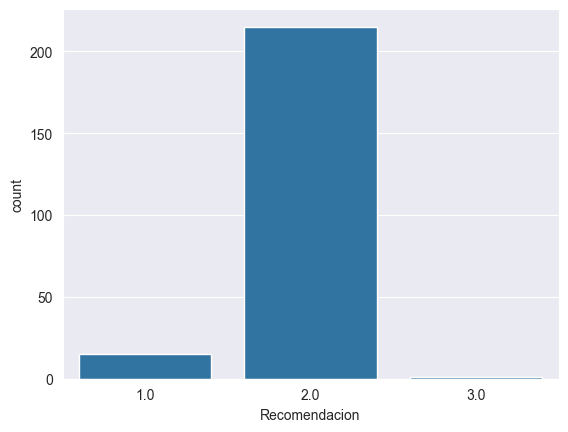

In [19]:
#Verificar si hay una proporción equilibrada entre los diferentes valores de la variable objetivo para un buen modelado posterior
sns.countplot(x='Recomendacion',data=df)

(10.0, 0.0)

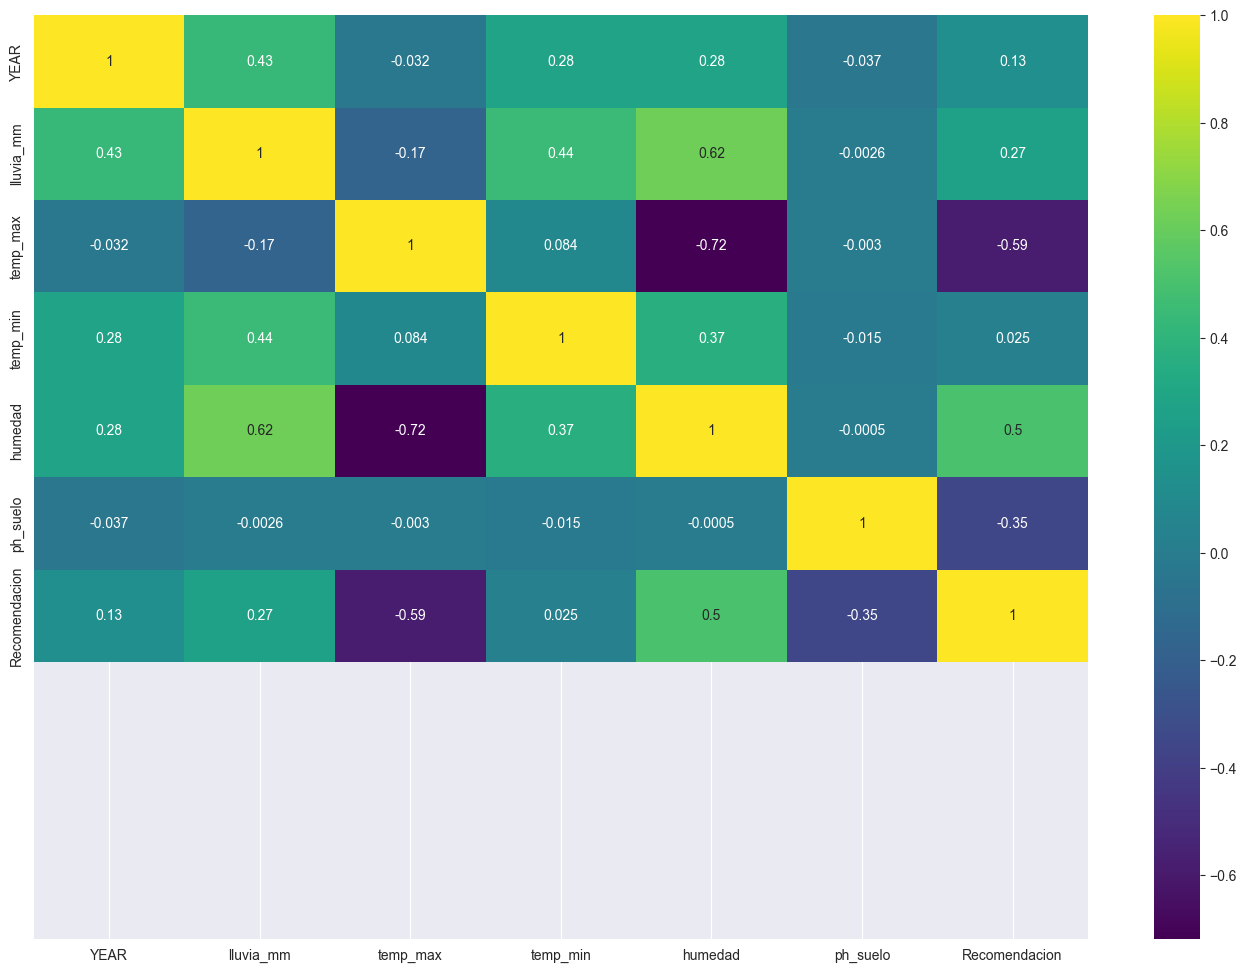

In [20]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [21]:
df.corr(numeric_only = True)['Recomendacion'].sort_values()

temp_max        -0.585708
ph_suelo        -0.352320
temp_min         0.025427
YEAR             0.131099
lluvia_mm        0.266187
humedad          0.504286
Recomendacion    1.000000
Name: Recomendacion, dtype: float64

<Axes: >

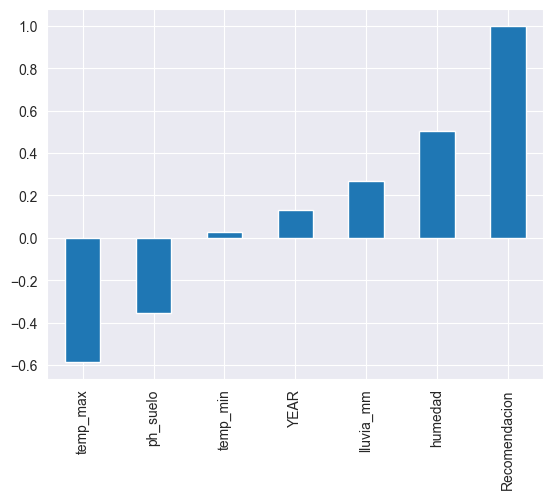

In [22]:
df.corr(numeric_only = True)['Recomendacion'].sort_values().plot(kind='bar')